In [ ]:
!pip install DeepXDE==0.10

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 756 kB 10.5 MB/s 
     |████████████████████████████████| 462 kB 61.6 MB/s 
     |████████████████████████████████| 76 kB 5.8 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 115 kB 65.6 MB/s 
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.12.2
    Uninstalling multiprocess-0.70.12.2:
      Successfully uninstalled multiprocess-0.70.12.2
Thu May 26 09:11:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  

Using TensorFlow 2 backend.

Instructions for updating:
non-resource variables are not supported in the long term
observe_x length = 15000
u length = 15000
observe_train length = 1500
u_train length = 1500
flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.074112 s



/usr/local/lib/python3.7/dist-packages/deepxde/maps/fnn.py:82: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_regularizer=self.regularizer,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 4.994667 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.04e-04, 7.05e-05, 3.47e-04, 5.79e-04, 3.86e-01, 5.13e-01]    [1.27e-04, 8.32e-05, 4.40e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [1.13e-04, 6.87e-05, 3.50e-04, 5.07e-04, 3.21e-01, 4.14e-01]    [1.29e-04, 8.01e-05, 4.43e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 7.36e-01
  test loss: 6.52e-04
  test metric: []

'train' took 3.590267 s

flag 3
out_path: /content
flag 3.5
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1         [1.13e-04, 6.87e-05, 3.50e-04, 5.07e-04, 3.21e-01, 4.14e-01]    [1.29e-04, 8.01e-05, 4.43e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [3.58e-04, 1.19e

/content/generate_plots_1d_MV.py:53: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='top right', borderpad=0.2)


Predicting...
'predict' took 0.002167 s

Predicting...
'predict' took 0.002670 s



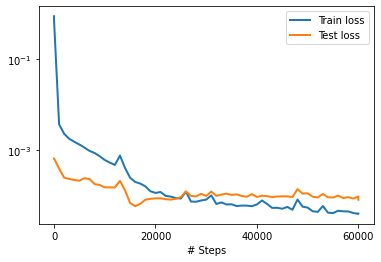

<Figure size 432x288 with 0 Axes>

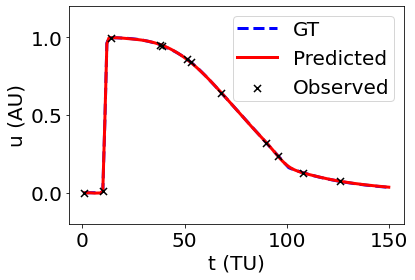

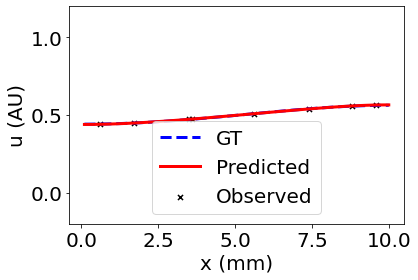

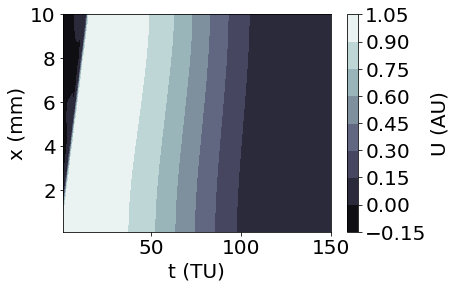

In [ ]:
import sys
import os
#dir_path = os.path.dirname(os.path.realpath(__file__))
#sys.path.append(dir_path)
dir_path = '/content'
sys.path.append(dir_path)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import argparse
import numpy as np
import deepxde as dde # version 0.11 or higher
#from generate_plots_1d import plot_1D  # should be changed for the new one
#from generate_plots_2d import plot_2D
from generate_plots_1d_MV import plot_1D
import utils

#if __name__ == "__main__":
    #parser = argparse.ArgumentParser()
    #parser.add_argument('-f', '--file-name', dest='file_name', required = True, type = str, help='File name for input data')
    #parser.add_argument('-m', '--model-folder-name', dest='model_folder_name', required = False, type = str, help='Folder name to save model (prefix /)')
    #parser.add_argument('-d', '--dimension', dest='dim', required = True, type = int, help='Model dimension. Needs to match the input data')
    #parser.add_argument('-n', '--noise', dest='noise', action='store_true', help='Add noise to the data')
    #parser.add_argument('-w', '--w-input', dest='w_input', action='store_true', help='Add W to the model input data')
    #parser.add_argument('-v', '--inverse', dest='inverse', required = False, type = str, help='Solve the inverse problem, specify variables to predict (e.g. a / ad / abd')
    #parser.add_argument('-ht', '--heter', dest='heter', required = False, action='store_true', help='Predict heterogeneity - only in 2D')
    #parser.add_argument('-p', '--plot', dest='plot', required = False, action='store_true', help='Create and save plots')
    #parser.add_argument('-a', '--animation', dest='animation', required = False, action='store_true', help='Create and save 2D Animation')
    #args = parser.parse_args()


## Network Parameters
# 1D
input_1d = 2 # network input size (1D) # dimension of the X
num_hidden_layers_1d = 4 # number of hidden layers for NN (1D)
hidden_layer_size_1d = 32 # size of each hidden layers (1D)
output_1d = 3 # network output size (1D)
# 2D
input_2d = 3 # network input size (2D)
num_hidden_layers_2d = 4 # number of hidden layers for NN (2D)
hidden_layer_size_2d = 32 # size of each hidden layers (2D)
output_2d = 3 # network output size (2D)
output_heter = 3 # network output size for heterogeneity case (2D)
## Training Parameters
num_domain = 20000 # number of training points within the domain
num_boundary = 1000 # number of training boundary condition points on the geometry boundary
num_test = 1000 # number of testing points within the domain
MAX_MODEL_INIT = 24 #16 # maximum number of times allowed to initialize the model
MAX_LOSS = 4 # upper limit to the initialized loss
epochs = 60000 #60000 # number of epochs for training
lr =  0.0005 # learning rate
noise = 0.1 # noise factor
test_size = 0.9 # precentage of testing data

def main():

    dim = 1
    noise_introduced = False
    inverse = False
    model_folder_name = "/content"
    animation = False
    heter = False
    w_used = False #data
    Vsav_bool = True

    ## Get Dynamics Class
    dynamics = utils.system_dynamics()

    ## Parameters to inverse (if needed)
    #params = dynamics.params_to_inverse(args.inverse)

    ## Generate Data
    #file_name = "Arieh_data_1D_usav_new_extended" # left stim
    #file_name = "Arieh_data_1D_usav_new_right_stim"  #right stim
    file_name = "Arieh_data_1D_UVWsav_extended" # with Vsav
    if Vsav_bool is True:
      observe_x, u, w, v = dynamics.generate_data(file_name, dim, Vsav_bool)
    else:
      observe_x, u, w = dynamics.generate_data(file_name, dim, Vsav_bool)

    print("observe_x length = " + str(len(observe_x)))
    print("u length = " + str(len(u)))

    ## Split data to train and test
    if Vsav_bool is True:
      observe_train, observe_test, u_train, u_test, w_train, w_test, v_train, v_test = train_test_split(observe_x, u, w, v, test_size=test_size)
    else:
      observe_train, observe_test, u_train, u_test = train_test_split(observe_x, u, test_size=test_size)
    print("observe_train length = " + str(len(observe_train)))
    print("u_train length = " + str(len(u_train)))
    ## Split with W
    if w_used:
      observe_train, observe_test, u_train, u_test, w_train, w_test = train_test_split(observe_x, u, w, test_size=test_size)

    ## Add noise to training data if needed
    if noise_introduced:
        u_train = u_train + noise*np.random.randn(u_train.shape[0], u_train.shape[1])

    ## Geometry and Time domains
    geomtime = dynamics.geometry_time(dim)
    ## Define Boundary Conditions
    bc = dynamics.BC_func(dim, geomtime)
    ## Define Initial Conditions
    ic = dynamics.IC_func(observe_train, u_train)

    ## Model observed data
    observe_u = dde.PointSetBC(observe_train, u_train, component=0)  # component says which component it is
    input_data = [bc, ic, observe_u]
    if w_used: ## If W required as an input
        observe_w = dde.PointSetBC(observe_train, w_train, component=1)  # probably will have to change component to =2s
        input_data = [bc, ic, observe_u, observe_w]

    ## Select relevant PDE (Dim, Heterogeneity) and define the Network
    if dim == 1:
        pde = dynamics.pde_1D
        net = dde.maps.FNN([input_1d] + [hidden_layer_size_1d] * num_hidden_layers_1d + [output_1d], "tanh", "Glorot uniform")
    elif dim == 2 and heter:
        pde = dynamics.pde_2D_heter
        net = dde.maps.FNN([input_2d] + [hidden_layer_size_2d] * num_hidden_layers_2d + [output_heter], "tanh", "Glorot uniform")
        net.apply_output_transform(dynamics.modify_output_heter)
    elif dim == 2 and not heter:
        pde = dynamics.pde_2D
        net = dde.maps.FNN([input_2d] + [hidden_layer_size_2d] * num_hidden_layers_2d + [output_2d], "tanh", "Glorot uniform")
    pde_data = dde.data.TimePDE(geomtime, pde, input_data,
                            num_domain = num_domain,
                            num_boundary=num_boundary,
                            anchors=observe_train,
                            num_test=num_test)
    model = dde.Model(pde_data, net)
    #loss_weights = [1]*(len(input_data)+2)  # original
    #loss_weights = [1]*(len(input_data)+3)   # mine (new)
    #loss_weights[0:2] = (1.5,1.5)
    #model.compile("adam", lr=lr, loss_weights=loss_weights)
    print("flag 1")
    model.compile("adam", lr=lr)
    print("flag 2")

    ## Stabalize initialization process by capping the losses
    losshistory, _ = model.train(epochs=1)
    num_itertions = len(losshistory.loss_train)
    initial_loss = max(losshistory.loss_train[num_itertions - 1])
    num_init = 0
    while initial_loss>MAX_LOSS or np.isnan(initial_loss).any() or np.isinf(initial_loss).any():  # added checking for inf values
        num_init += 1
        model = dde.Model(pde_data, net)
        model.compile("adam", lr=lr)
        #model.compile("adam", lr=lr, loss_weights=loss_weights)
        losshistory, _ = model.train(epochs=1)
        initial_loss = max(losshistory.loss_train[0])
        if num_init > MAX_MODEL_INIT:
            raise ValueError('Model initialization phase exceeded the allowed limit')

    print("flag 3")

    ## Train Network
    out_path = dir_path
    print("out_path: " + out_path)
    if inverse:
        print("flag 3.1")
        variables_file = "variables_" + args.inverse + ".dat"
        print("flag 3.2")
        variable = dde.callbacks.VariableValue(params, period=1000, filename=variables_file)
        print("flag 3.3")
        losshistory, train_state = model.train(epochs=epochs, model_save_path = out_path, callbacks=[variable])
        print("flag 3.4")
    else:
        print("flag 3.5")
        losshistory, train_state = model.train(epochs=epochs, model_save_path = out_path, display_every=1000)  # crashes here
        print("flag 3.6")

    # Plot loss history
    loss_train = np.sum(losshistory.loss_train, axis=1)
    loss_test = np.sum(losshistory.loss_test, axis=1)

    plt.figure()
    plt.semilogy(losshistory.steps, loss_train, label="Train loss", linewidth=2)
    plt.semilogy(losshistory.steps, loss_test, label="Test loss", linewidth=2)
    for i in range(len(losshistory.metrics_test[0])):
        plt.semilogy(
            losshistory.steps,
            np.array(losshistory.metrics_test)[:, i],
            label="Test metric",
        )
    plt.xlabel("# Steps")
    plt.legend()

    print("flag 4")

    ## Compute rMSE
    #prediction = model.predict(observe_test)
    #u_pred, v_pred, w_pred = prediction[0]  # add predict V and W and then plot them (in forward mode)

    u_pred = model.predict(observe_test)[:,0:1]
    rmse_u = np.sqrt(np.square(u_pred - u_test).mean())
    print('--------------------------')
    print("V rMSE for test data:", rmse_u)
    print('--------------------------')
    print("Arguments: ")
    #print("Arguments: ", args)

    print("flag 5")

    # Plot
    if Vsav_bool is True:
      data_list = [observe_x, observe_train, u_train, u, w_train, w, v_train, v]
    else:
      data_list = [observe_x, observe_train, u_train, u]
    if True and dim == 1:
        plot_1D(data_list, dynamics, model, model_folder_name)
    elif True and dim == 2:
        plot_2D(data_list, dynamics, model, animation, model_folder_name)

    return model, data_list, dynamics, model, model_folder_name

## Run main code
#model = main()
model, data_list,dynamics, model, model_folder_name = main()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#from PIL import Image
import io

def plot_1D(data_list,dynamics, model, fig_name):

    plot_1D_cell(data_list, dynamics, model, fig_name[1:])
    plot_1D_array(data_list, dynamics, model, fig_name[1:])
    plot_1D_grid(dynamics, model, fig_name[1:])
    plot_Vsav(data_list, dynamics, model, fig_name[1:])
    plot_Wsav(data_list, dynamics, model, fig_name[1:])
    return 0

def plot_1D_cell(data_list, dynamics, model, fig_name):

    ## Unpack data
    observe_x, observe_train, v_train, v = data_list[0], data_list[1], data_list[2], data_list[3]

    ## Pick a cell to show
    cell = dynamics.max_x*0.75
    lnw = 3.0 # line width
    szm = 50 # marker size
    ftsz = 20 # font size

    ## Get data for cell
    idx = [i for i,ix in enumerate(observe_x) if observe_x[i][0]==cell]
    observe_geomtime = observe_x[idx]
    v_GT = v[idx]
    v_predict = model.predict(observe_geomtime)[:,0:1]
    t_axis = observe_geomtime[:,1]

    ## Get data for points used in training process
    idx_train = [i for i,ix in enumerate(observe_train) if observe_train[i][0]==cell]
    v_trained_points = v_train[idx_train]
    t_markers = (observe_train[idx_train])[:,1]

    ## create figure
    plt.figure()
    plt.rc('font', size= ftsz) #controls default text 
    fig, ax = plt.subplots()
    GT, = ax.plot(t_axis, v_GT, c='b', label='GT',linewidth=lnw, linestyle = 'dashed', zorder=0)
    Predicted, = ax.plot(t_axis, v_predict, c='r', label='Predicted',linewidth=lnw, zorder=5)
    #plt.scatter(t_axis, v_predict, marker='x', c='r',s=szm, label='Predicted2')
    # If there are any trained data points for the current cell
    if len(t_markers):
        print("observed points = " + str(len(t_markers)))
        Observed = ax.scatter(t_markers, v_trained_points, marker='x', c='black',s=szm, label='Observed', zorder=10)
    #plt.legend(ncol = 2, loc = 'lower center', fontsize = ftsz)
    #lines = ax.get_lines()
    #first_legend = plt.legend([lines[i] for i in [0,1]], ["GT", "Predicted"], loc='lower center')
    #ax.add_artist(first_legend)
    #second_legend = plt.legend(lines[2], ["Observed"], loc=2)
    #ax.add_artist(second_legend)
    #plt.legend(handles=[Observed], borderpad=0.2)
    plt.legend(loc='top right', borderpad=0.2)
    plt.xlabel('t (TU)', fontsize = ftsz)
    plt.ylabel('u (AU)', fontsize = ftsz)
    plt.ylim((-0.2,1.2))

    ## save figure
    # png1 = io.BytesIO()
    plt.savefig(fig_name + "_cell_plot_1D.png", format="png", dpi=500, pad_inches = .1, bbox_inches = 'tight')
    # plt.savefig(png1, format="eps", dpi=500, pad_inches = .1, bbox_inches = 'tight')
    plt.savefig(fig_name + "_cell_plot_1D.svg", format="svg", dpi=500, pad_inches = .1, bbox_inches = 'tight')
#    png2 = Image.open(png1)
#    png2.save(fig_name + "_cell_plot_1D.tiff")
    # png1.close()
    return 0

def plot_1D_array(data_list, dynamics, model, fig_name):
    lnw = 3.0 # line width
    szm = 26 # marker size
    ftsz = 20 # font size

    ## Unpack data
    observe_x, observe_train, v_train, v = data_list[0], data_list[1], data_list[2], data_list[3]

    ## Pick a point in time to show
    obs_t = dynamics.max_t/2

    ## Get all array data for chosen time
    idx = [i for i,ix in enumerate(observe_x) if observe_x[i][1]==obs_t]
    observe_geomtime = observe_x[idx]
    v_GT = v[idx]
    v_predict = model.predict(observe_geomtime)[:,0:1]
    x_ax = observe_geomtime[:,0]

    ## Get data for points used in training process
    idx_train = [i for i,ix in enumerate(observe_train) if observe_train[i][1]==obs_t]
    v_trained_points = v_train[idx_train]
    x_markers = (observe_train[idx_train])[:,0]

    ## create figure
    plt.figure()
    plt.rc('font', size= ftsz) #controls default text size
    plt.plot(x_ax, v_GT, c='b', label='GT',linewidth=lnw, linestyle = 'dashed')
    plt.plot(x_ax, v_predict, c='r', label='Predicted',linewidth=lnw)
    #plt.scatter(x_ax, v_predict, marker='x', c='r',s=szm, label='Predicted2')
    # If there are any trained data points for the current time step
    if len(x_markers):
        plt.scatter(x_markers, v_trained_points, marker='x', c='black',s=szm, label='Observed')
    plt.legend(fontsize = ftsz, loc = 'lower center')
    plt.xlabel('x (mm)', fontsize = ftsz)
    plt.ylabel('u (AU)', fontsize = ftsz)
    plt.ylim((-0.2,1.2))

    ## save figure
    # png1 = io.BytesIO()
    plt.savefig(fig_name + "_array_plot_1D.png", format="png", dpi=500, pad_inches = .1, bbox_inches = 'tight')
    # plt.savefig(png1, format="eps", dpi=500, pad_inches = .1, bbox_inches = 'tight')
    plt.savefig(fig_name + "_array_plot_1D.svg", format="svg", dpi=500, pad_inches = .1, bbox_inches = 'tight')
#    png2 = Image.open(png1)
#    png2.save(fig_name + "_array_plot_1D.tiff")
    # png1.close()
    return 0

def plot_1D_grid(dynamics, model, fig_name):
    lnw = 3.0 # line width
    szm = 26 # marker size
    ftsz = 20 # font size
    grid_size = 200

    ## Get data
    x = np.linspace(dynamics.min_x,dynamics.max_x, grid_size)
    t = np.linspace(dynamics.min_t,dynamics.max_t,grid_size)
    X, T = np.meshgrid(x,t)
    X_data = X.reshape(-1,1)
    T_data = T.reshape(-1,1)
    data = np.hstack((X_data, T_data))
    v_pred = model.predict(data)[:,0:1]
    Z = np.zeros((grid_size,grid_size))
    for i in range(grid_size):
        Z[i,:] = (v_pred[(i*grid_size):((i+1)*grid_size)]).reshape(-1)

    ## create figure
    plt.figure()
    plt.rc('font', size= ftsz) #controls default text size
    contour = plt.contourf(T,X,Z, levels = np.arange(-0.15,1.06,0.15) , cmap=plt.cm.bone)
    plt.xlabel('t (TU)', fontsize = ftsz)
    plt.ylabel('x (mm)', fontsize = ftsz)
    cbar = plt.colorbar(contour)
    cbar.ax.set_ylabel('u (AU)', fontsize = ftsz)

    ## save figure
    # png1 = io.BytesIO()
    plt.savefig(fig_name + "_grid_plot_1D.png", format="png", dpi=500, pad_inches = .1, bbox_inches = 'tight')
    # plt.savefig(png1, format="eps", dpi=500, pad_inches = .1, bbox_inches = 'tight')
    plt.savefig(fig_name + "_grid_plot_1D.svg", format="svg", dpi=500, pad_inches = .1, bbox_inches = 'tight')
#    png2 = Image.open(png1)
#    png2.save(fig_name + "_grid_plot_1D.tiff")
    # png1.close()
    return 0

def plot_Vsav(data_list, dynamics, model, fig_name):

    ## Unpack data
    observe_x, observe_train, v_train, v, w_train, w, vv_train, vv = data_list[0], data_list[1], data_list[2], data_list[3], data_list[4], data_list[5], data_list[6], data_list[7]

    ## Pick a cell to show
    cell = dynamics.max_x*0.75
    lnw = 3.0 # line width
    szm = 50 # marker size
    ftsz = 20 # font size

    ## Get data for cell
    idx = [i for i,ix in enumerate(observe_x) if observe_x[i][0]==cell]
    observe_geomtime = observe_x[idx]
    vv_GT = vv[idx]
    vv_predict = model.predict(observe_geomtime)[:,1]
    t_axis = observe_geomtime[:,1]

    ## Get data for points used in training process
    idx_train = [i for i,ix in enumerate(observe_train) if observe_train[i][0]==cell]
    vv_trained_points = vv_train[idx_train]
    t_markers = (observe_train[idx_train])[:,1]

    ## create figure
    plt.figure()
    plt.rc('font', size= ftsz) #controls default text 
    fig, ax = plt.subplots()
    GT, = ax.plot(t_axis, vv_GT, c='b', label='GT',linewidth=lnw, linestyle = 'dashed', zorder=0)
    Predicted, = ax.plot(t_axis, vv_predict, c='r', label='Predicted',linewidth=lnw, zorder=5)

    if len(t_markers):
        print("observed points = " + str(len(t_markers)))
        Observed = ax.scatter(t_markers, vv_trained_points, marker='x', c='black',s=szm, label='Observed', zorder=10)

    plt.legend(loc='top right', borderpad=0.2)
    plt.xlabel('t (TU)', fontsize = ftsz)
    plt.ylabel('v (AU)', fontsize = ftsz)
    plt.ylim((-0.2,1.2))

    ## save figure
    # png1 = io.BytesIO()
    plt.savefig(fig_name + "_vsav_plot_1D.png", format="png", dpi=500, pad_inches = .1, bbox_inches = 'tight')
    # plt.savefig(png1, format="eps", dpi=500, pad_inches = .1, bbox_inches = 'tight')
    plt.savefig(fig_name + "_vsav_plot_1D.png", format="svg", dpi=500, pad_inches = .1, bbox_inches = 'tight')


def plot_Wsav(data_list, dynamics, model, fig_name):

    ## Unpack data
    observe_x, observe_train, v_train, v, w_train, w, vv_train, vv = data_list[0], data_list[1], data_list[2], data_list[3], data_list[4], data_list[5], data_list[6], data_list[7]

    ## Pick a cell to show
    cell = dynamics.max_x*0.75
    lnw = 3.0 # line width
    szm = 50 # marker size
    ftsz = 20 # font size

    ## Get data for cell
    idx = [i for i,ix in enumerate(observe_x) if observe_x[i][0]==cell]
    observe_geomtime = observe_x[idx]
    w_GT = w[idx]
    w_predict = model.predict(observe_geomtime)[:,2]
    t_axis = observe_geomtime[:,1]

    ## Get data for points used in training process
    idx_train = [i for i,ix in enumerate(observe_train) if observe_train[i][0]==cell]
    w_trained_points = w_train[idx_train]
    t_markers = (observe_train[idx_train])[:,1]

    ## create figure
    plt.figure()
    plt.rc('font', size= ftsz) #controls default text 
    fig, ax = plt.subplots()
    GT, = ax.plot(t_axis, w_GT, c='b', label='GT',linewidth=lnw, linestyle = 'dashed', zorder=0)
    Predicted, = ax.plot(t_axis, w_predict, c='r', label='Predicted',linewidth=lnw, zorder=5)
    #plt.scatter(t_axis, v_predict, marker='x', c='r',s=szm, label='Predicted2')
    # If there are any trained data points for the current cell
    if len(t_markers):
        print("observed points = " + str(len(t_markers)))
        Observed = ax.scatter(t_markers, w_trained_points, marker='x', c='black',s=szm, label='Observed', zorder=10)
    #plt.legend(ncol = 2, loc = 'lower center', fontsize = ftsz)
    #lines = ax.get_lines()
    #first_legend = plt.legend([lines[i] for i in [0,1]], ["GT", "Predicted"], loc='lower center')
    #ax.add_artist(first_legend)
    #second_legend = plt.legend(lines[2], ["Observed"], loc=2)
    #ax.add_artist(second_legend)
    #plt.legend(handles=[Observed], borderpad=0.2)
    plt.legend(loc='top right', borderpad=0.2)
    plt.xlabel('t (TU)', fontsize = ftsz)
    plt.ylabel('w (AU)', fontsize = ftsz)
    plt.ylim((-0.2,1.2))

    ## save figure
    # png1 = io.BytesIO()
    plt.savefig(fig_name + "_wsav_plot_1D.png", format="png", dpi=500, pad_inches = .1, bbox_inches = 'tight')
    # plt.savefig(png1, format="eps", dpi=500, pad_inches = .1, bbox_inches = 'tight')
    plt.savefig(fig_name + "_wsav_plot_1D.png", format="svg", dpi=500, pad_inches = .1, bbox_inches = 'tight')

Predicting...
'predict' took 0.002001 s

observed points = 12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Predicting...
'predict' took 0.001944 s

Predicting...
'predict' took 0.002876 s

Predicting...
'predict' took 0.001959 s

observed points = 12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:189: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Predicting...
'predict' took 0.001935 s

observed points = 12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:242: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


0

<Figure size 432x288 with 0 Axes>

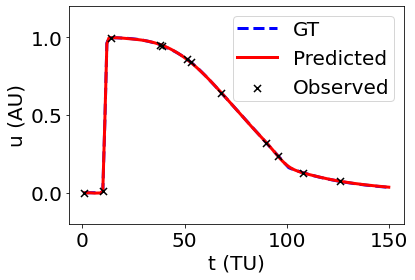

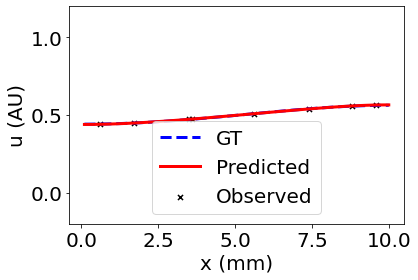

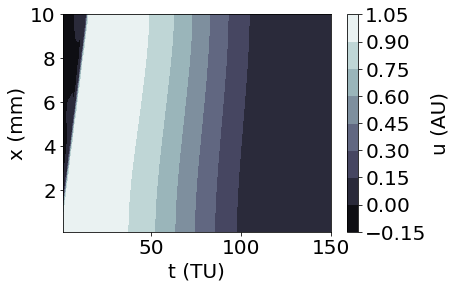

<Figure size 432x288 with 0 Axes>

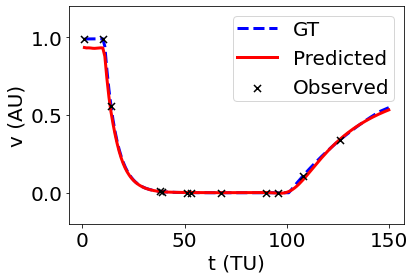

<Figure size 432x288 with 0 Axes>

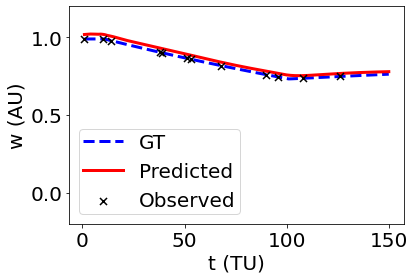

In [ ]:
plot_1D(data_list,dynamics, model, model_folder_name)

flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.063573 s



/usr/local/lib/python3.7/dist-packages/deepxde/maps/fnn.py:82: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_regularizer=self.regularizer,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 1.132256 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [6.36e-03, 4.80e-04, 2.37e-04, 2.39e-03, 3.38e-01, 2.35e-01]    [6.78e-03, 5.27e-04, 2.57e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [7.53e-03, 5.91e-04, 2.68e-04, 2.09e-03, 2.72e-01, 1.61e-01]    [7.90e-03, 6.38e-04, 2.92e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 4.44e-01
  test loss: 8.83e-03
  test metric: []

'train' took 0.727126 s

flag 3
out_path: /content
flag 3.5
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1         [7.53e-03, 5.91e-04, 2.68e-04, 2.09e-03, 2.72e-01, 1.61e-01]    [7.90e-03, 6.38e-04, 2.92e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [4.95e-04, 1.00e

/content/generate_plots_1d_MV.py:53: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='top right', borderpad=0.2)


Predicting...
'predict' took 0.002081 s

Predicting...
'predict' took 0.002585 s

flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.064597 s



/usr/local/lib/python3.7/dist-packages/deepxde/maps/fnn.py:82: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_regularizer=self.regularizer,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 1.134280 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [3.04e-02, 7.97e-04, 7.69e-04, 4.92e-03, 5.03e-01, 2.25e-01]    [3.14e-02, 8.29e-04, 9.59e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [2.73e-02, 5.82e-04, 8.05e-04, 4.46e-03, 3.86e-01, 1.79e-01]    [2.79e-02, 6.10e-04, 9.88e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 5.98e-01
  test loss: 2.95e-02
  test metric: []

'train' took 0.816375 s

flag 3
out_path: /content
flag 3.5
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1         [2.73e-02, 5.82e-04, 8.05e-04, 4.46e-03, 3.86e-01, 1.79e-01]    [2.79e-02, 6.10e-04, 9.88e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [9.57e-04, 1.10e

/content/generate_plots_1d_MV.py:53: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='top right', borderpad=0.2)


Predicting...
'predict' took 0.001939 s

Predicting...
'predict' took 0.002526 s

flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.063061 s



/usr/local/lib/python3.7/dist-packages/deepxde/maps/fnn.py:82: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_regularizer=self.regularizer,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 1.170716 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [6.04e-03, 2.97e-03, 1.21e-03, 1.48e-04, 2.74e-01, 2.75e-01]    [6.55e-03, 3.44e-03, 1.54e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [1.29e-02, 1.26e-02, 1.16e-03, 1.23e-04, 2.26e-01, 2.33e-01]    [1.38e-02, 1.27e-02, 1.48e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 4.85e-01
  test loss: 2.80e-02
  test metric: []

'train' took 0.889718 s

flag 3
out_path: /content
flag 3.5
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1         [1.29e-02, 1.26e-02, 1.16e-03, 1.23e-04, 2.26e-01, 2.33e-01]    [1.38e-02, 1.27e-02, 1.48e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [9.71e-04, 1.20e

/content/generate_plots_1d_MV.py:53: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='top right', borderpad=0.2)


Predicting...
'predict' took 0.002040 s

Predicting...
'predict' took 0.002353 s

flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.063962 s



/usr/local/lib/python3.7/dist-packages/deepxde/maps/fnn.py:82: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_regularizer=self.regularizer,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 1.172863 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.43e-01, 9.31e-03, 3.71e-04, 9.57e-03, 3.62e+00, 7.02e-01]    [1.45e-01, 9.30e-03, 4.16e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [1.36e-01, 8.34e-03, 3.68e-04, 8.61e-03, 3.25e+00, 6.47e-01]    [1.37e-01, 8.35e-03, 4.12e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 4.05e+00
  test loss: 1.46e-01
  test metric: []

'train' took 1.033713 s

flag 3
out_path: /content
flag 3.5
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1         [1.36e-01, 8.34e-03, 3.68e-04, 8.61e-03, 3.25e+00, 6.47e-01]    [1.37e-01, 8.35e-03, 4.12e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [5.22e-04, 1.21e

/content/generate_plots_1d_MV.py:53: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='top right', borderpad=0.2)


Predicting...
'predict' took 0.003232 s

Predicting...
'predict' took 0.002536 s

flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.074982 s



/usr/local/lib/python3.7/dist-packages/deepxde/maps/fnn.py:82: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_regularizer=self.regularizer,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 1.263481 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [4.71e-04, 4.46e-04, 8.42e-05, 4.84e-04, 5.66e-02, 3.47e-01]    [6.50e-04, 5.29e-04, 1.12e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [4.12e-03, 8.86e-04, 8.00e-05, 5.02e-04, 5.78e-02, 2.28e-01]    [4.16e-03, 9.85e-04, 1.08e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 2.91e-01
  test loss: 5.25e-03
  test metric: []

'train' took 1.200346 s

flag 3
out_path: /content
flag 3.5
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1         [4.12e-03, 8.86e-04, 8.00e-05, 5.02e-04, 5.78e-02, 2.28e-01]    [4.16e-03, 9.85e-04, 1.08e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [1.21e-03, 1.15e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:166: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/content/generate_plots_1d_MV.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/content/generate_plots_1d_MV.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/content/ge

Predicting...
'predict' took 0.001922 s



/content/generate_plots_1d_MV.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Predicting...
'predict' took 0.002409 s



/content/generate_plots_1d_MV.py:134: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.067119 s



/usr/local/lib/python3.7/dist-packages/deepxde/maps/fnn.py:82: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_regularizer=self.regularizer,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 1.261237 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.07e-04, 3.90e-04, 1.22e-04, 4.99e-04, 4.86e-01, 5.54e-01]    [1.04e-04, 4.05e-04, 1.21e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [8.46e-05, 3.98e-04, 1.12e-04, 3.83e-04, 4.11e-01, 4.43e-01]    [8.20e-05, 4.12e-04, 1.11e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 8.56e-01
  test loss: 6.04e-04
  test metric: []

'train' took 1.328577 s

flag 3
out_path: /content
flag 3.5
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1         [8.46e-05, 3.98e-04, 1.12e-04, 3.83e-04, 4.11e-01, 4.43e-01]    [8.20e-05, 4.12e-04, 1.11e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [2.33e-04, 1.01e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:166: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/content/generate_plots_1d_MV.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/content/generate_plots_1d_MV.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/content/ge

Predicting...
'predict' took 0.001773 s



/content/generate_plots_1d_MV.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Predicting...
'predict' took 0.002501 s



/content/generate_plots_1d_MV.py:134: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.064504 s



/usr/local/lib/python3.7/dist-packages/deepxde/maps/fnn.py:82: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_regularizer=self.regularizer,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 1.331393 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.21e-02, 3.26e-04, 1.17e-03, 3.77e-04, 6.51e-02, 1.17e-01]    [1.19e-02, 3.18e-04, 1.09e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [9.63e-03, 2.65e-04, 1.14e-03, 4.46e-04, 4.52e-02, 1.10e-01]    [9.42e-03, 2.58e-04, 1.06e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 1.67e-01
  test loss: 1.07e-02
  test metric: []

'train' took 1.433321 s

flag 3
out_path: /content
flag 3.5
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1         [9.63e-03, 2.65e-04, 1.14e-03, 4.46e-04, 4.52e-02, 1.10e-01]    [9.42e-03, 2.58e-04, 1.06e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [3.55e-04, 8.31e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:166: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/content/generate_plots_1d_MV.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/content/generate_plots_1d_MV.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/content/ge

Predicting...
'predict' took 0.001933 s



/content/generate_plots_1d_MV.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Predicting...
'predict' took 0.002464 s



/content/generate_plots_1d_MV.py:134: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.066117 s



/usr/local/lib/python3.7/dist-packages/deepxde/maps/fnn.py:82: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_regularizer=self.regularizer,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 1.321823 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [4.58e-04, 1.72e-04, 1.17e-03, 2.45e-04, 1.61e-01, 2.52e-01]    [4.84e-04, 2.00e-04, 1.51e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [8.74e-04, 1.82e-04, 1.16e-03, 1.90e-04, 1.15e-01, 2.26e-01]    [9.19e-04, 2.12e-04, 1.49e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 3.44e-01
  test loss: 2.62e-03
  test metric: []

'train' took 1.601119 s

flag 3
out_path: /content
flag 3.5
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1         [8.74e-04, 1.82e-04, 1.16e-03, 1.90e-04, 1.15e-01, 2.26e-01]    [9.19e-04, 2.12e-04, 1.49e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [3.47e-04, 8.14e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:166: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/content/generate_plots_1d_MV.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/content/generate_plots_1d_MV.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/content/ge

Predicting...
'predict' took 0.002167 s



/content/generate_plots_1d_MV.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Predicting...
'predict' took 0.002402 s



/content/generate_plots_1d_MV.py:134: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.068929 s



/usr/local/lib/python3.7/dist-packages/deepxde/maps/fnn.py:82: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_regularizer=self.regularizer,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 1.392222 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [3.13e-03, 4.73e-04, 3.32e-04, 1.91e-03, 5.20e-02, 3.19e-01]    [3.18e-03, 4.94e-04, 3.90e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [1.30e-02, 6.46e-04, 3.22e-04, 1.71e-03, 4.92e-02, 2.47e-01]    [1.28e-02, 6.71e-04, 3.82e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 3.12e-01
  test loss: 1.39e-02
  test metric: []

'train' took 1.675666 s

flag 3
out_path: /content
flag 3.5
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1         [1.30e-02, 6.46e-04, 3.22e-04, 1.71e-03, 4.92e-02, 2.47e-01]    [1.28e-02, 6.71e-04, 3.82e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [6.37e-04, 1.16e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:166: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/content/generate_plots_1d_MV.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/content/generate_plots_1d_MV.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/content/ge

Predicting...
'predict' took 0.002046 s



/content/generate_plots_1d_MV.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Predicting...
'predict' took 0.002395 s



/content/generate_plots_1d_MV.py:134: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.076115 s



/usr/local/lib/python3.7/dist-packages/deepxde/maps/fnn.py:82: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_regularizer=self.regularizer,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 1.408597 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [2.25e-04, 6.71e-04, 4.69e-04, 1.58e-03, 1.49e+00, 1.15e+00]    [2.70e-04, 8.52e-04, 5.04e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [1.41e-04, 6.16e-04, 4.83e-04, 1.44e-03, 1.28e+00, 9.33e-01]    [1.68e-04, 7.77e-04, 5.20e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 2.22e+00
  test loss: 1.47e-03
  test metric: []

'train' took 1.777909 s

flag 3
out_path: /content
flag 3.5
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1         [1.41e-04, 6.16e-04, 4.83e-04, 1.44e-03, 1.28e+00, 9.33e-01]    [1.68e-04, 7.77e-04, 5.20e-04, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [1.06e-03, 1.38e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:166: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/content/generate_plots_1d_MV.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/content/generate_plots_1d_MV.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/content/ge

Predicting...
'predict' took 0.001903 s



/content/generate_plots_1d_MV.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Predicting...
'predict' took 0.002430 s



/content/generate_plots_1d_MV.py:134: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


TypeError: ignored

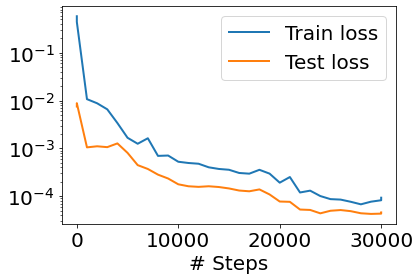

<Figure size 432x288 with 0 Axes>

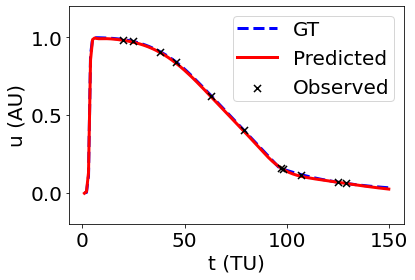

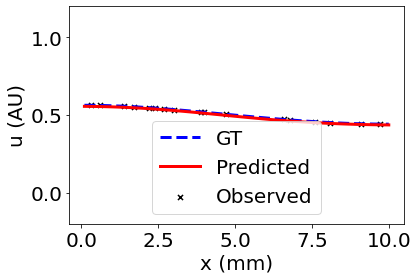

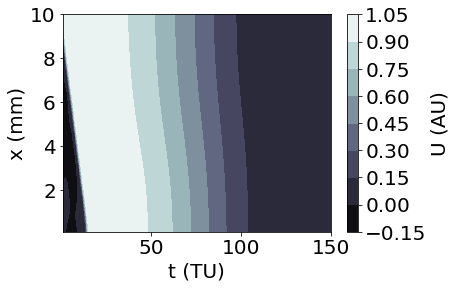

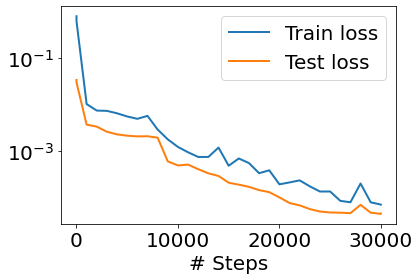

<Figure size 432x288 with 0 Axes>

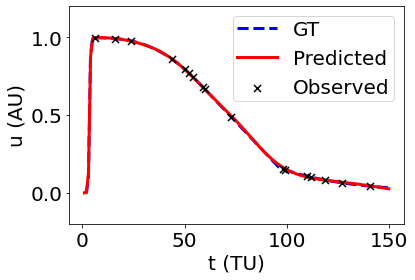

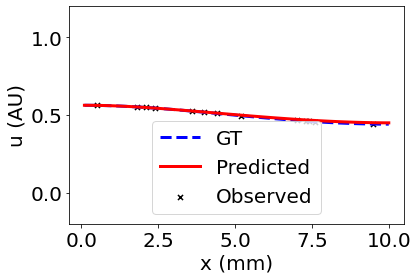

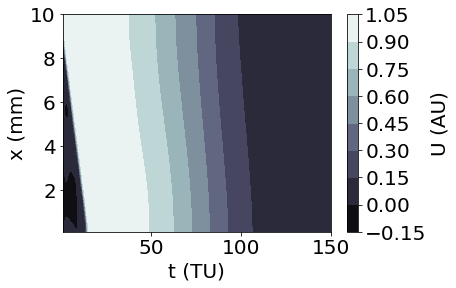

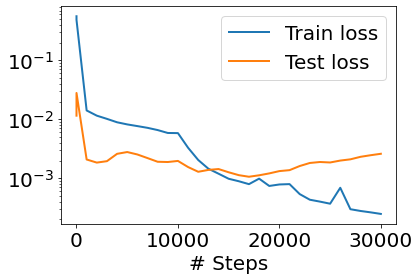

<Figure size 432x288 with 0 Axes>

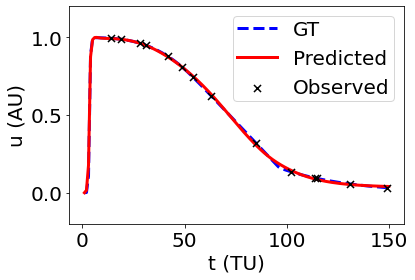

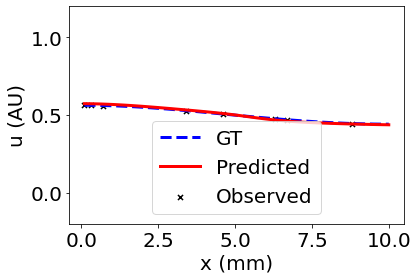

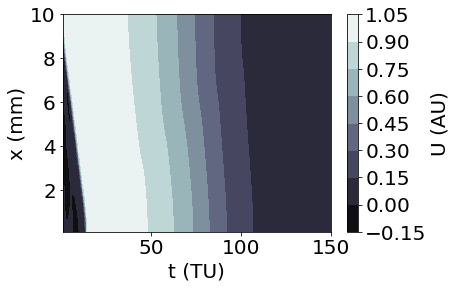

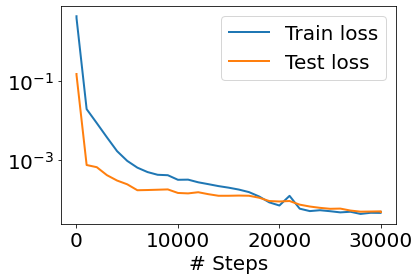

<Figure size 432x288 with 0 Axes>

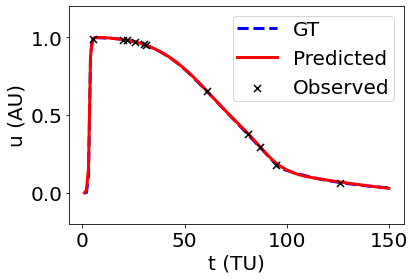

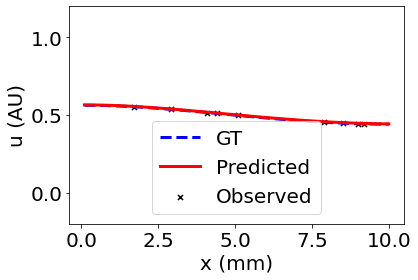

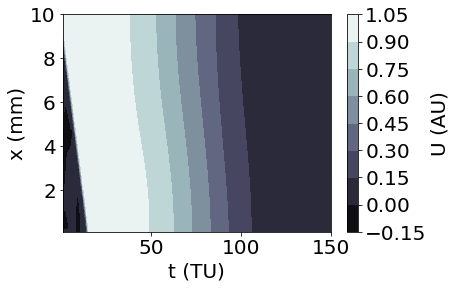

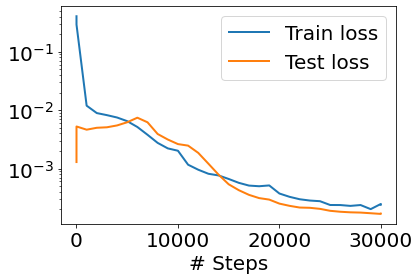

<Figure size 432x288 with 0 Axes>

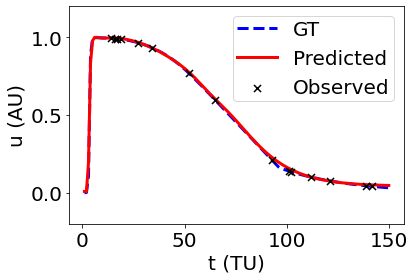

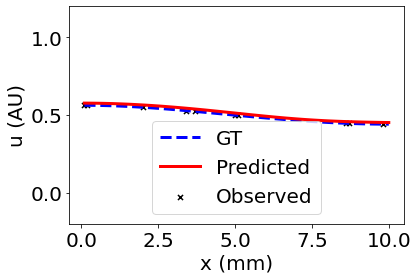

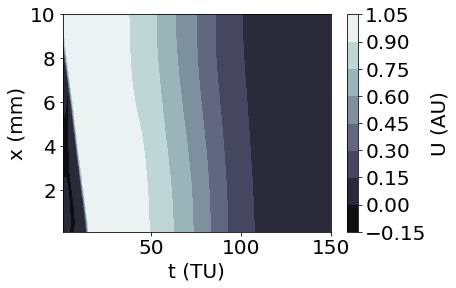

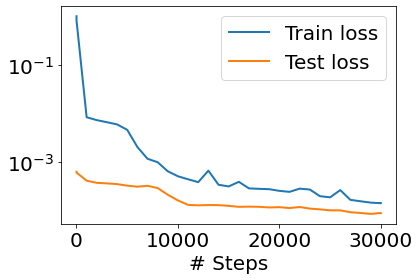

<Figure size 432x288 with 0 Axes>

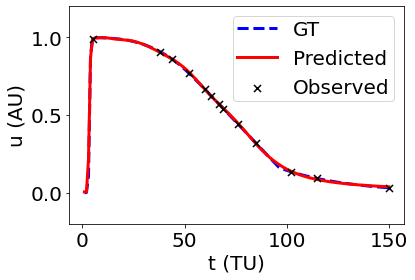

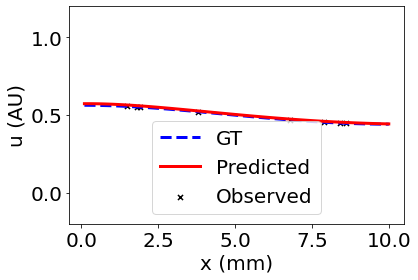

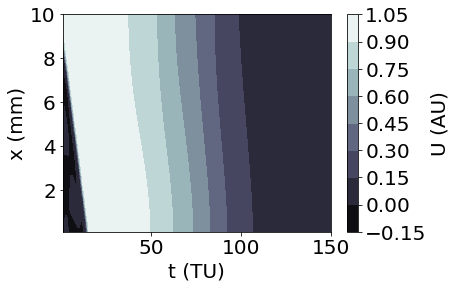

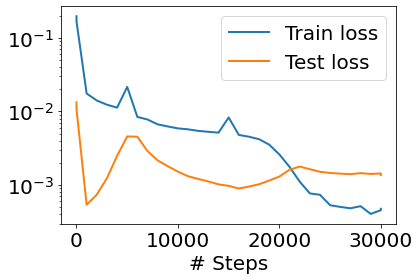

<Figure size 432x288 with 0 Axes>

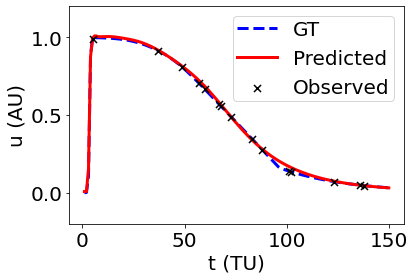

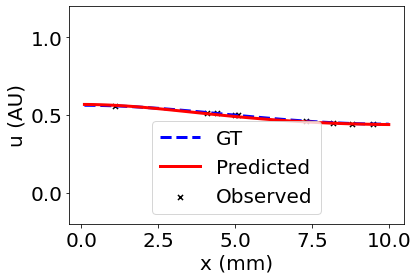

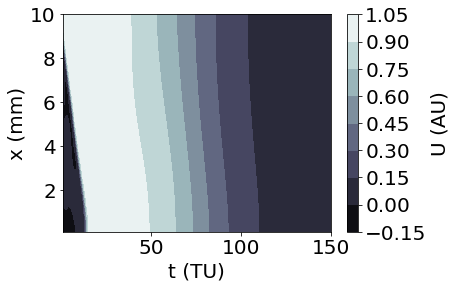

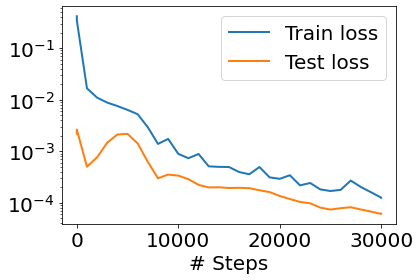

<Figure size 432x288 with 0 Axes>

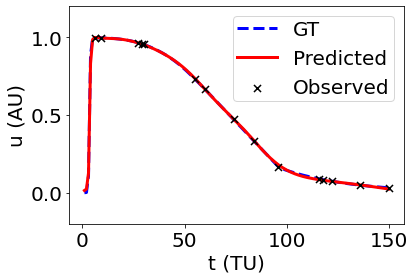

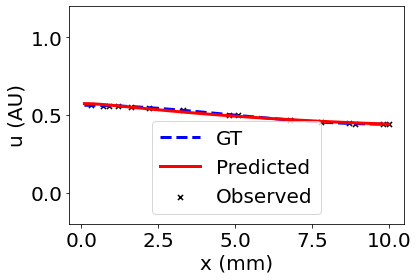

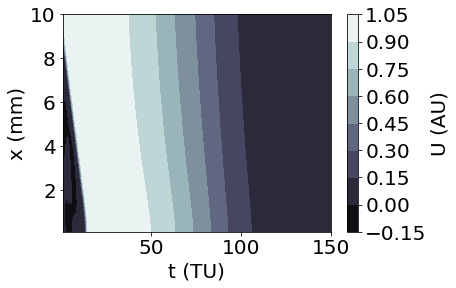

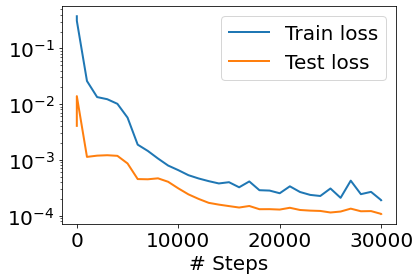

<Figure size 432x288 with 0 Axes>

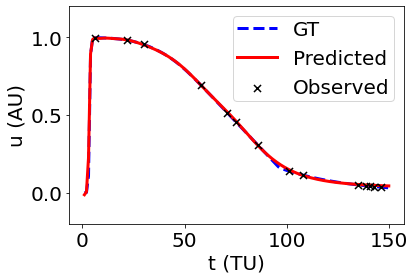

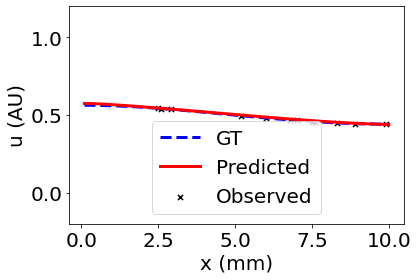

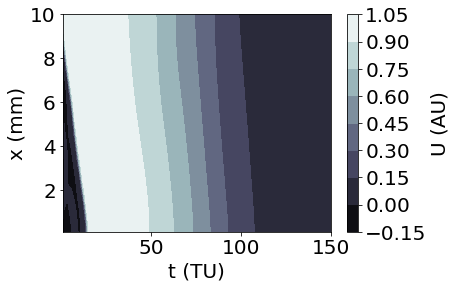

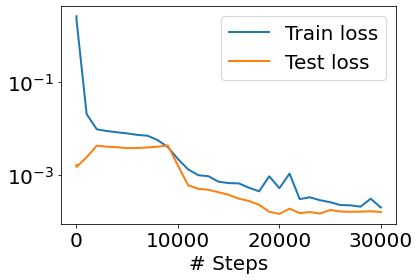

<Figure size 432x288 with 0 Axes>

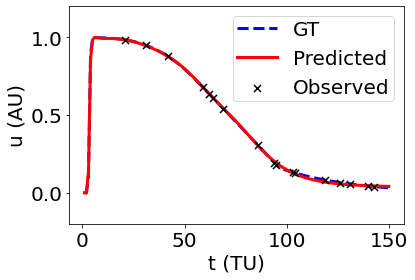

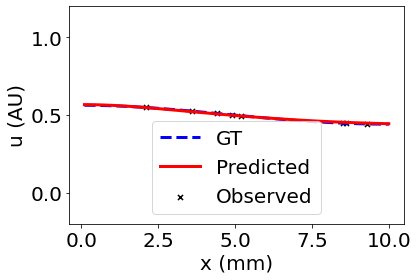

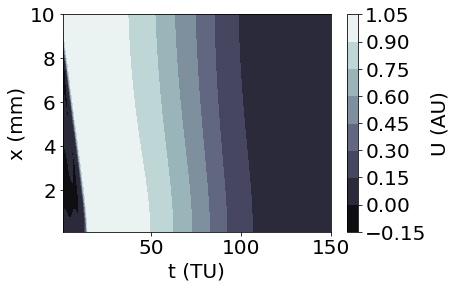

In [ ]:
import sys
import os
#dir_path = os.path.dirname(os.path.realpath(__file__))
#sys.path.append(dir_path)
dir_path = '/content'
sys.path.append(dir_path)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import argparse
import numpy as np
import deepxde as dde # version 0.11 or higher
#from generate_plots_1d import plot_1D  # should be changed for the new one
#from generate_plots_2d import plot_2D
from generate_plots_1d_MV import plot_1D
import utils
import csv

#if __name__ == "__main__":
    #parser = argparse.ArgumentParser()
    #parser.add_argument('-f', '--file-name', dest='file_name', required = True, type = str, help='File name for input data')
    #parser.add_argument('-m', '--model-folder-name', dest='model_folder_name', required = False, type = str, help='Folder name to save model (prefix /)')
    #parser.add_argument('-d', '--dimension', dest='dim', required = True, type = int, help='Model dimension. Needs to match the input data')
    #parser.add_argument('-n', '--noise', dest='noise', action='store_true', help='Add noise to the data')
    #parser.add_argument('-w', '--w-input', dest='w_input', action='store_true', help='Add W to the model input data')
    #parser.add_argument('-v', '--inverse', dest='inverse', required = False, type = str, help='Solve the inverse problem, specify variables to predict (e.g. a / ad / abd')
    #parser.add_argument('-ht', '--heter', dest='heter', required = False, action='store_true', help='Predict heterogeneity - only in 2D')
    #parser.add_argument('-p', '--plot', dest='plot', required = False, action='store_true', help='Create and save plots')
    #parser.add_argument('-a', '--animation', dest='animation', required = False, action='store_true', help='Create and save 2D Animation')
    #args = parser.parse_args()


## Network Parameters
# 1D
input_1d = 2 # network input size (1D) # dimension of the X
num_hidden_layers_1d = 4 # number of hidden layers for NN (1D)
hidden_layer_size_1d = 32 # size of each hidden layers (1D)
output_1d = 3 # network output size (1D)
# 2D
input_2d = 3 # network input size (2D)
num_hidden_layers_2d = 4 # number of hidden layers for NN (2D)
hidden_layer_size_2d = 32 # size of each hidden layers (2D)
output_2d = 3 # network output size (2D)
output_heter = 3 # network output size for heterogeneity case (2D)
## Training Parameters
num_domain = 20000 # number of training points within the domain
num_boundary = 1000 # number of training boundary condition points on the geometry boundary
num_test = 1000 # number of testing points within the domain
MAX_MODEL_INIT = 24 #16 # maximum number of times allowed to initialize the model
MAX_LOSS = 4 # upper limit to the initialized loss
epochs = 30000 #60000 # number of epochs for training
lr =  0.0005 # learning rate
noise = 0.1 # noise factor
test_size = 0.9 # precentage of testing data

rmse_iterations_list = []

def main():

    dim = 1
    noise_introduced = False
    inverse = False
    model_folder_name = "/content"
    animation = False
    heter = False
    w_used = False #data

    for iter in range(10):

      ## Get Dynamics Class
      dynamics = utils.system_dynamics()

      ## Parameters to inverse (if needed)
      #params = dynamics.params_to_inverse(args.inverse)

      ## Generate Data
      file_name = "Arieh_data_1D_usav_new_extended_rightstim" # left stim
      #file_name = "Arieh_data_1D_usav_new_right_stim"  #right stim
      observe_x, u, w = dynamics.generate_data(file_name, dim)

      ## Split data to train and test
      observe_train, observe_test, u_train, u_test = train_test_split(observe_x, u, test_size=test_size)
      ## Split with W
      if w_used:
        observe_train, observe_test, u_train, u_test, w_train, w_test = train_test_split(observe_x, u, w, test_size=test_size)

      ## Add noise to training data if needed
      if noise_introduced:
          u_train = u_train + noise*np.random.randn(u_train.shape[0], u_train.shape[1])

      ## Geometry and Time domains
      geomtime = dynamics.geometry_time(dim)
      ## Define Boundary Conditions
      bc = dynamics.BC_func(dim, geomtime)
      ## Define Initial Conditions
      ic = dynamics.IC_func(observe_train, u_train)

      ## Model observed data
      observe_u = dde.PointSetBC(observe_train, u_train, component=0)  # component says which component it is
      input_data = [bc, ic, observe_u]
      if w_used: ## If W required as an input
          observe_w = dde.PointSetBC(observe_train, w_train, component=1)  # probably will have to change component to =2s
          input_data = [bc, ic, observe_u, observe_w]

      ## Select relevant PDE (Dim, Heterogeneity) and define the Network
      if dim == 1:
          pde = dynamics.pde_1D
          net = dde.maps.FNN([input_1d] + [hidden_layer_size_1d] * num_hidden_layers_1d + [output_1d], "tanh", "Glorot uniform")
      elif dim == 2 and heter:
          pde = dynamics.pde_2D_heter
          net = dde.maps.FNN([input_2d] + [hidden_layer_size_2d] * num_hidden_layers_2d + [output_heter], "tanh", "Glorot uniform")
          net.apply_output_transform(dynamics.modify_output_heter)
      elif dim == 2 and not heter:
          pde = dynamics.pde_2D
          net = dde.maps.FNN([input_2d] + [hidden_layer_size_2d] * num_hidden_layers_2d + [output_2d], "tanh", "Glorot uniform")
      pde_data = dde.data.TimePDE(geomtime, pde, input_data,
                              num_domain = num_domain,
                              num_boundary=num_boundary,
                              anchors=observe_train,
                              num_test=num_test)
      model = dde.Model(pde_data, net)
      #loss_weights = [1]*(len(input_data)+2)  # original
      #loss_weights = [1]*(len(input_data)+3)   # mine (new)
      #loss_weights[0:2] = (1.5,1.5)
      #model.compile("adam", lr=lr, loss_weights=loss_weights)
      print("flag 1")
      model.compile("adam", lr=lr)
      print("flag 2")

      ## Stabalize initialization process by capping the losses
      losshistory, _ = model.train(epochs=1)
      num_itertions = len(losshistory.loss_train)
      initial_loss = max(losshistory.loss_train[num_itertions - 1])
      num_init = 0
      while initial_loss>MAX_LOSS or np.isnan(initial_loss).any() or np.isinf(initial_loss).any():  # added checking for inf values
          num_init += 1
          model = dde.Model(pde_data, net)
          model.compile("adam", lr=lr)
          #model.compile("adam", lr=lr, loss_weights=loss_weights)
          losshistory, _ = model.train(epochs=1)
          initial_loss = max(losshistory.loss_train[0])
          if num_init > MAX_MODEL_INIT:
              raise ValueError('Model initialization phase exceeded the allowed limit')

      print("flag 3")

      ## Train Network
      out_path = dir_path
      print("out_path: " + out_path)
      if inverse:
          print("flag 3.1")
          variables_file = "variables_" + args.inverse + ".dat"
          print("flag 3.2")
          variable = dde.callbacks.VariableValue(params, period=1000, filename=variables_file)
          print("flag 3.3")
          losshistory, train_state = model.train(epochs=epochs, model_save_path = out_path, callbacks=[variable])
          print("flag 3.4")
      else:
          print("flag 3.5")
          losshistory, train_state = model.train(epochs=epochs, model_save_path = out_path, display_every=1000)  # crashes here
          print("flag 3.6")

      # Plot loss history
      loss_train = np.sum(losshistory.loss_train, axis=1)
      loss_test = np.sum(losshistory.loss_test, axis=1)

      plt.figure()
      plt.semilogy(losshistory.steps, loss_train, label="Train loss", linewidth=2)
      plt.semilogy(losshistory.steps, loss_test, label="Test loss", linewidth=2)
      for i in range(len(losshistory.metrics_test[0])):
          plt.semilogy(
              losshistory.steps,
              np.array(losshistory.metrics_test)[:, i],
              label="Test metric",
          )
      plt.xlabel("# Steps")
      plt.legend()

      print("flag 4")

      ## Compute rMSE
      u_pred = model.predict(observe_test)[:,0:1]
      rmse_u = np.sqrt(np.square(u_pred - u_test).mean())
      print('--------------------------')
      print("V rMSE for test data:", rmse_u)
      print('--------------------------')
      print("Arguments: ")
      #print("Arguments: ", args)

      print("flag 5")

      #apppend rmse
      rmse_iterations_list.append(rmse_u)

      # Plot
      data_list = [observe_x, observe_train, u_train, u]
      if True and dim == 1:
          plot_1D(data_list, dynamics, model, model_folder_name)
      elif True and dim == 2:
          plot_2D(data_list, dynamics, model, animation, model_folder_name)

      #return model, data_list, dynamics, model, model_folder_name
    
    with open('rmse_iterations', 'w') as f:
      # using csv.writer method from CSV package
      write = csv.writer(f)
      write.writerow(rmse_iterations_list)

## Run main code
#model = main()
model, data_list,dynamics, model, model_folder_name = main()
